In [1]:
                             ###OLD FILE###
import geojson

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

In [2]:

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)
del df

In [3]:
#Group by hours and aggregate values according to each cell/hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
dfgg = dfgr[['hour', 'cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour', 'cellid'], as_index=False).sum()
#dfgg = dfgg.set_index(['hour']).sort_index()

del dfs
print(dfgg)

#Group by hours and aggregate values according to the hour
#dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
#dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
#dfgg = dfgr[['hour', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour'], as_index=False).sum()
#dfgg = dfgg.set_index(['hour']).sort_index()
#print(dfgg)

         hour  cellid     smsin    smsout    callin   callout    internet
0           0       1  2.084285  1.104749  0.591930  0.429290   57.799009
1           0       2  2.091501  1.087979  0.602031  0.438173   57.914858
2           0       3  2.099183  1.070129  0.612784  0.447628   58.038173
3           0       4  2.063383  1.153322  0.562672  0.403561   57.463453
4           0       5  1.870766  1.043851  0.510983  0.373990   52.171423
...       ...     ...       ...       ...       ...       ...         ...
2399989   239    9996  6.054090  6.946597  1.640647  4.461988  277.006021
2399990   239    9997  7.169133  6.872796  1.482668  5.482080  280.252966
2399991   239    9998  6.950347  6.901188  1.509687  5.291210  280.206203
2399992   239    9999  4.068024  4.816966  1.490447  2.965692  214.932905
2399993   239   10000  3.580726  2.847060  1.250935  2.658222  181.829832

[2399994 rows x 7 columns]


In [4]:
l=[] #choosen cells on 10x10 grid
for i in range(4273,5273,100):
    for j in range(i,i+10):
        l.append(j)

In [5]:
df10 = pd.DataFrame({})

for el in dfgg.iterrows():
    if(l.count(int(el[1].cellid))==1):
        tmp = pd.DataFrame([[int(el[1].hour), int(el[1].cellid), el[1].smsin, el[1].smsout, el[1].callin, el[1].callout, el[1].internet]], columns=['hour', 'cellid', 'smsin','smsout', 'callin','callout', 'internet'])
        df10=df10.append(tmp)



In [6]:
df10 = df10.set_index(['hour']).sort_index()
print(df10)

      cellid       smsin     smsout     callin    callout    internet
hour                                                                 
0       4273    5.274033   4.612629   1.175696   3.987281  376.656698
0       4274    5.309327   4.815926   2.169242   2.349438  235.482651
0       4275   13.736824  16.592372   4.075791   6.197356  302.465292
0       4276   94.540247  75.061959  18.622495  26.872258  576.316362
0       4277  128.004822  92.299175  24.826640  35.176368  674.116411
...      ...         ...        ...        ...        ...         ...
239     5178    7.079475   5.160725   4.407656   1.727244  335.069609
239     5179    8.316477   5.048183   4.181287   2.045839  350.433594
239     5180    9.565491   6.083170   3.077989   3.371633  359.659132
239     5181    8.292050   4.566094   2.691010   2.742752  321.769054
239     5182    3.034287   1.182458   1.139238   0.945481  115.215237

[24000 rows x 6 columns]


In [7]:
cells = df10.cellid
scaler=MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df10), columns=df10.columns, index=df10.index)

In [8]:
dfgg=scaled
dfgg['cellid']=cells
print(dfgg)

      cellid     smsin    smsout    callin   callout  internet
hour                                                          
0       4273  0.001985  0.002018  0.001058  0.003146  0.032379
0       4274  0.001999  0.002107  0.001953  0.001854  0.020054
0       4275  0.005171  0.007260  0.003669  0.004889  0.025902
0       4276  0.035589  0.032842  0.016766  0.021200  0.049810
0       4277  0.048186  0.040384  0.022351  0.027752  0.058348
...      ...       ...       ...       ...       ...       ...
239     5178  0.002665  0.002258  0.003968  0.001363  0.028748
239     5179  0.003131  0.002209  0.003764  0.001614  0.030090
239     5180  0.003601  0.002662  0.002771  0.002660  0.030895
239     5181  0.003121  0.001998  0.002423  0.002164  0.027587
239     5182  0.001142  0.000517  0.001026  0.000746  0.009554

[24000 rows x 6 columns]


In [9]:
dfgg.to_csv("./csv/normalized10x10.csv")
dfgr = dfgg

In [10]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

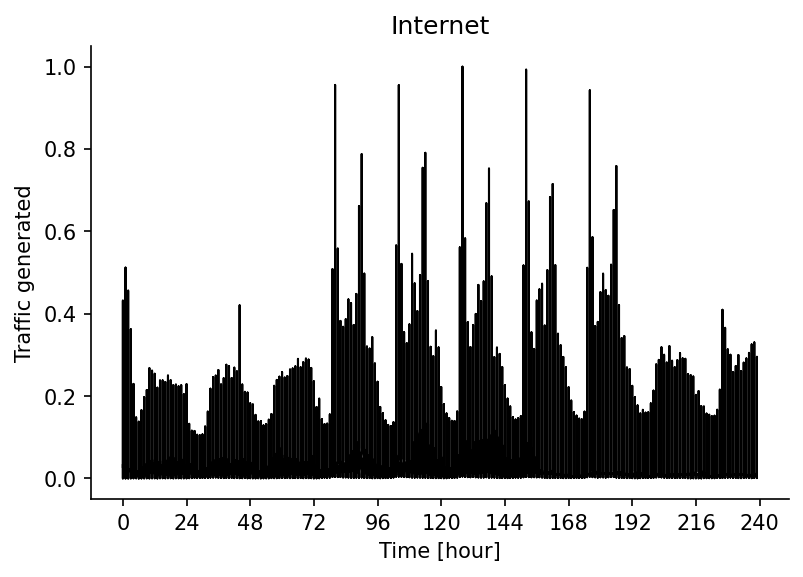

In [11]:
#Office area - industrial zone
ydatai1 = dfgg['internet']
xdatai1 = dfgg['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-')
plt.title("Internet")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
#plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

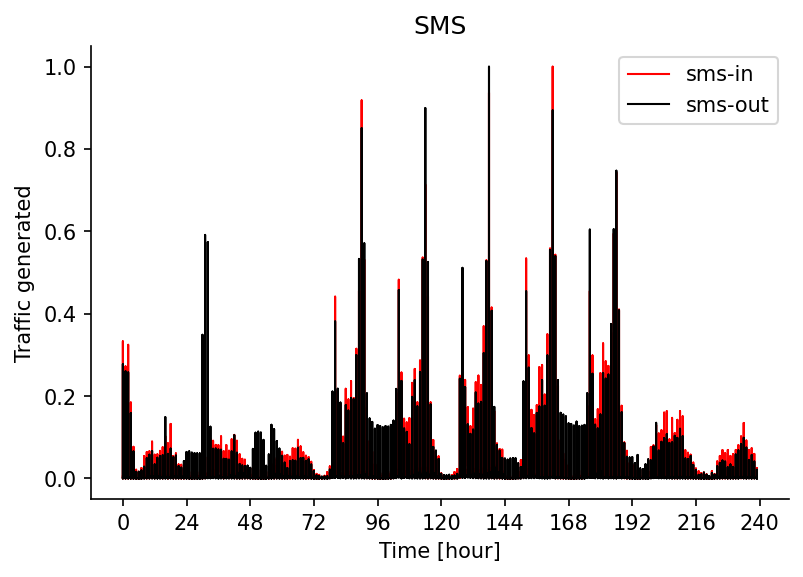

In [12]:
#Office area - industrial zone
ydatai1 = dfgg['smsin']
xdatai1 = dfgg['smsin'].index
ydatai2 = dfgg['smsout']
xdatai2 = dfgg['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='sms-in')
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='sms-out')
plt.title("SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

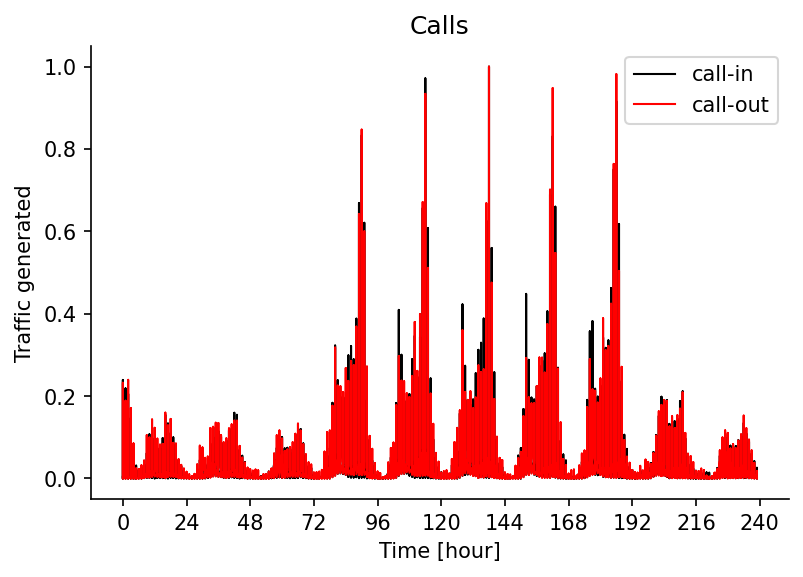

In [13]:
#Office area - industrial zone
ydatai1 = dfgg['callin']
xdatai1 = dfgg['callin'].index
ydatai2 = dfgg['callout']
xdatai2 = dfgg['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='call-in')
plt.plot(xdatai2, ydatai2, color='red', linewidth=1, linestyle='-', label='call-out')
plt.title("Calls")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

In [12]:
print("CELL 3420 - office area")

CELL 3586 - office area


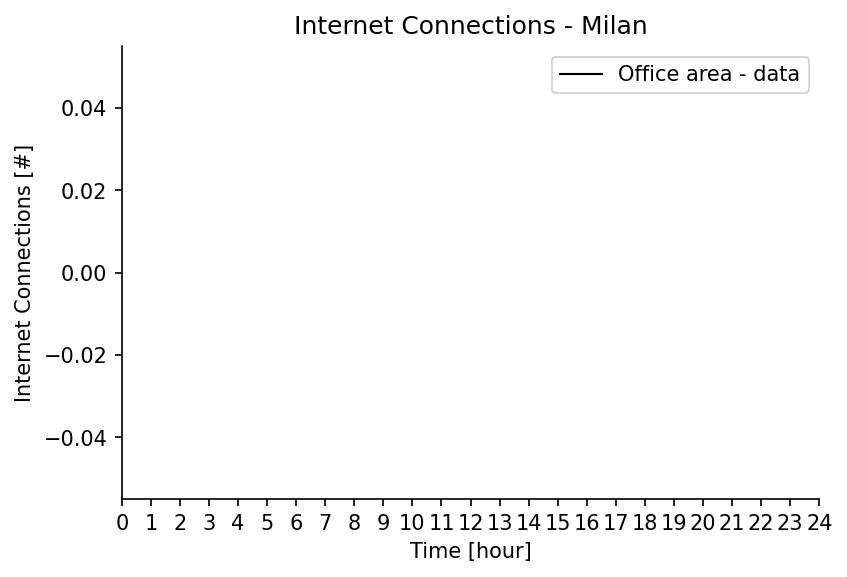

In [14]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3420]['internet']
xdatai1 = dfgr[dfgr.cellid==3420]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Milan")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
#plt.savefig('./wday-time/int-work.png')
plt.show()

In [ ]:

ydatasi1 = dfgr[dfgr.cellid==3420]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3420]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work.png')
plt.show()

In [ ]:

ydataso1 = dfgr[dfgr.cellid==3586]['smsout']
xdataso1 = dfgr[dfgr.cellid==3586]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work.png')
plt.show()

In [ ]:

ydataci1 = dfgr[dfgr.cellid==3586]['callin']
xdataci1 = dfgr[dfgr.cellid==3586]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work.png')
plt.show()

In [ ]:

ydataco1 = dfgr[dfgr.cellid==3586]['callout']
xdataco1 = dfgr[dfgr.cellid==3586]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work.png')
plt.show()

In [ ]:
print("CELL 4283 - transport area - highway")

In [ ]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==4283]['internet']
xdatai2 = dfgr[dfgr.cellid==4283]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans.png')
plt.show()

In [ ]:

ydatasi2 = dfgr[dfgr.cellid==4283]['smsin']
xdatasi2 = dfgr[dfgr.cellid==4283]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans.png')
plt.show()

In [ ]:

ydataso2 = dfgr[dfgr.cellid==4283]['smsout']
xdataso2 = dfgr[dfgr.cellid==4283]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans.png')
plt.show()

In [ ]:

ydataci2 = dfgr[dfgr.cellid==4283]['callin']
xdataci2 = dfgr[dfgr.cellid==4283]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans.png')
plt.show()

In [ ]:

ydataco2 = dfgr[dfgr.cellid==4283]['callout']
xdataco2 = dfgr[dfgr.cellid==4283]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans.png')
plt.show()

In [ ]:
print("CELL 5343 - home area - Via Rembrandt")

In [ ]:
#Home area (near Via Rembrandt) data
ydatai3 = dfgr[dfgr.cellid==5343]['internet']
xdatai3 = dfgr[dfgr.cellid==5343]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home.png')
plt.show()

In [ ]:

ydatasi3 = dfgr[dfgr.cellid==5343]['smsin']
xdatasi3 = dfgr[dfgr.cellid==5343]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home.png')
plt.show()

In [ ]:

ydataso3 = dfgr[dfgr.cellid==5343]['smsout']
xdataso3 = dfgr[dfgr.cellid==5343]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home.png')
plt.show()

In [ ]:

ydataci3 = dfgr[dfgr.cellid==5343]['callin']
xdataci3 = dfgr[dfgr.cellid==5343]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home.png')
plt.show()

In [ ]:

ydataco3 = dfgr[dfgr.cellid==5343]['callout']
xdataco3 = dfgr[dfgr.cellid==5343]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/internet-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-comparative2.png')
plt.show()